# Challenge 3

In [15]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
print(titanic.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [13]:
# your code here- numerical variable
titanic.select_dtypes(include=['int64','float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
#your code here- categorical variable
titanic.select_dtypes(include='object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [17]:
# your code here
plt.figure(figsize=(12,6))
plt.style.use('classic')


<Figure size 864x432 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

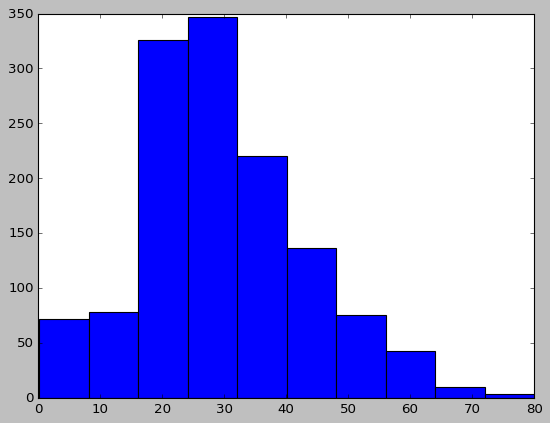

In [28]:
# your code here
plt.hist(titanic.Age);


#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

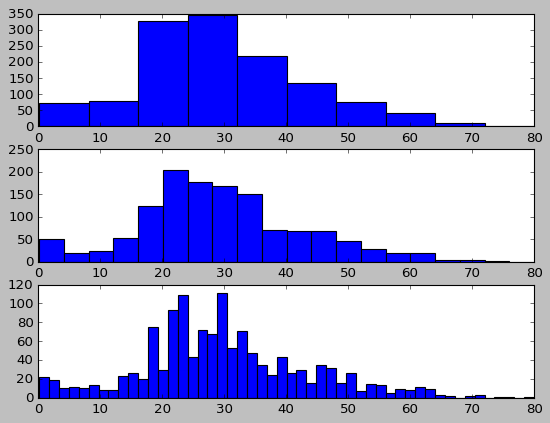

In [31]:
# your code here
plt.subplot(3,1,1)
plt.hist(titanic.Age, bins=10);
plt.subplot(3,1,2)
plt.hist(titanic.Age, bins=20);
plt.subplot(3,1,3)
plt.hist(titanic.Age, bins=50);

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
The more bins the more detail of the distribuction 

#### Use seaborn to show the distribution of the column `Age`

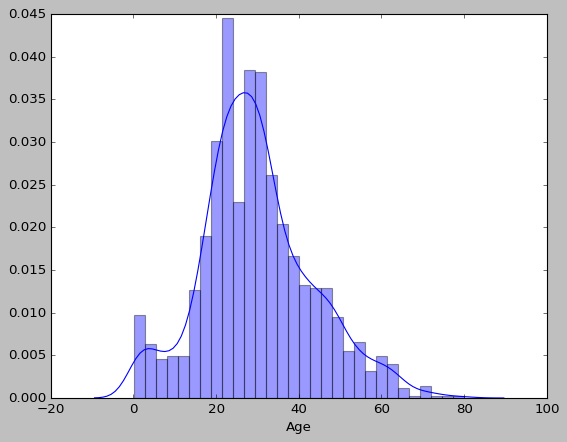

In [33]:
# your code here
sns.distplot(titanic.Age);

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

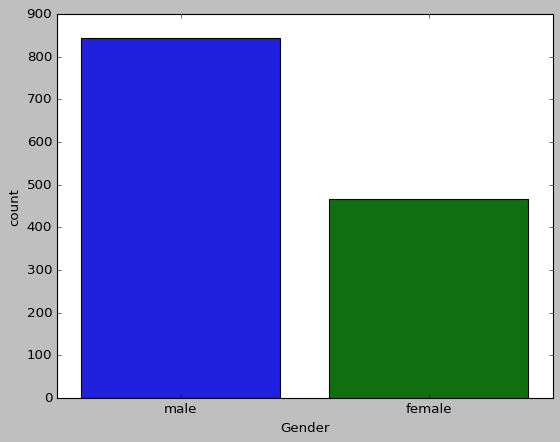

In [34]:
# your code here- 1st way
sns.countplot('Gender', data=titanic);

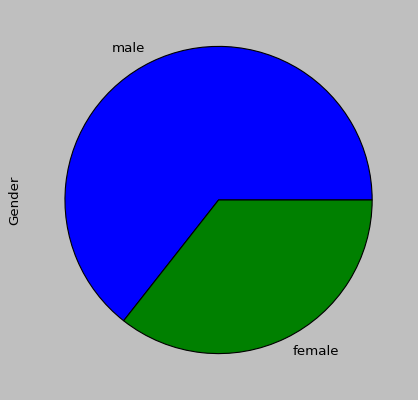

In [43]:
# your code here- 2nd way

titanic.Gender.value_counts().plot(kind="pie");

#genero.values(), labels = genero.keys(), autopct="%.1f");

#### Use the appropriate plot to visualize the column `Pclass` 


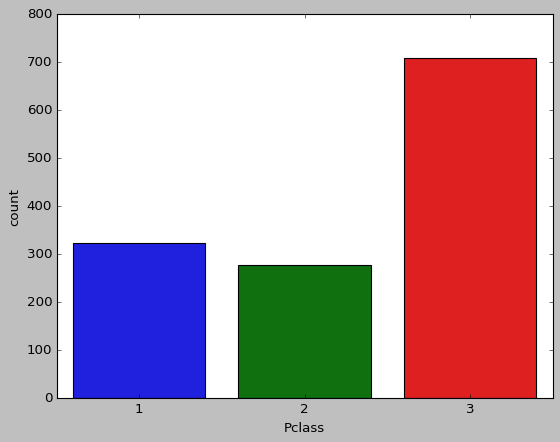

In [45]:
# your code here
sns.countplot("Pclass", data=titanic);

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

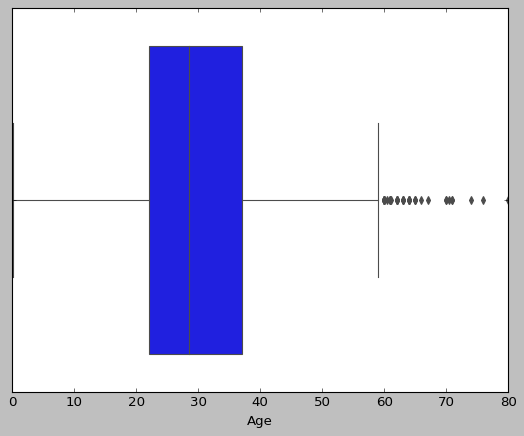

In [47]:
# your code here
sns.boxplot('Age',data=titanic);

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
"""Most people had between 20 y.o. and 40 y.o. and only a few of them where more than 60 y.o. (actually every single point 
from 60 y.o. to 80 y.o. means one person. The youngest was 0 y.o. or really close to it and the oldest was 80 y.o."""


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

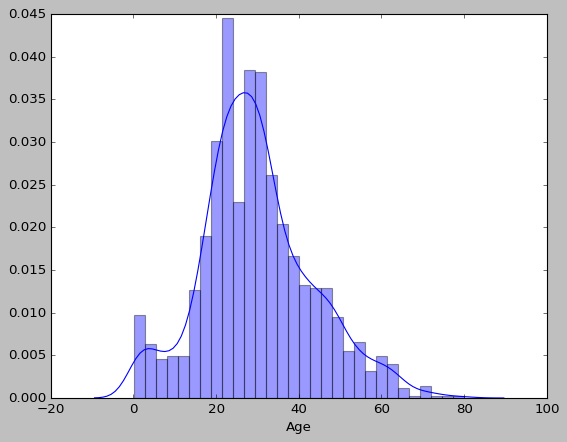

In [53]:
#your code here
sns.distplot(titanic.Age);

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
#Not really very much more but we can appreciate with more detail the distribution

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

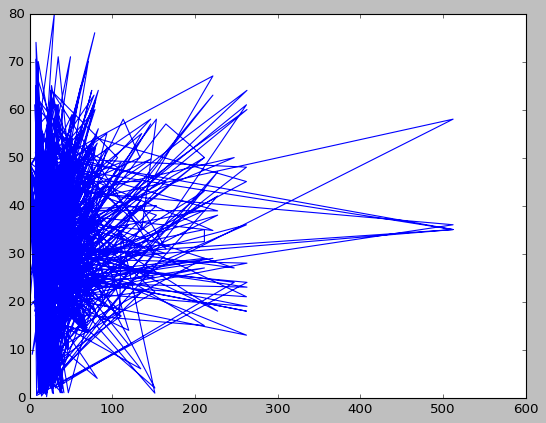

In [55]:
#your code-1st way
plt.plot(titanic['Fare'],titanic['Age']);

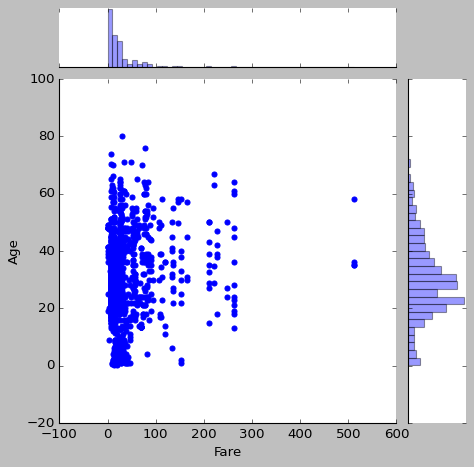

In [57]:
# your code-2nd way
sns.jointplot("Fare","Age", data=titanic);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

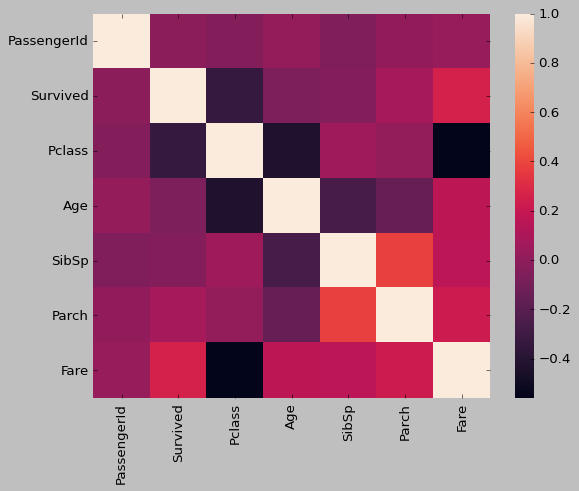

In [62]:
#your code here
sns.heatmap(titanic.corr());

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#SibSp and Parch

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

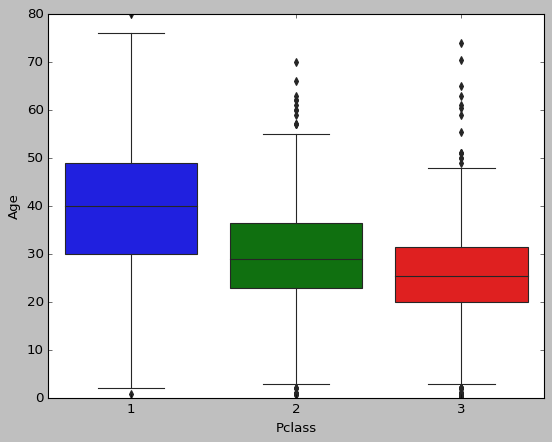

In [64]:
#your code here
sns.boxplot('Pclass','Age',data=titanic);

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

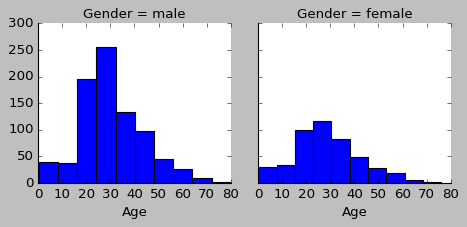

In [67]:
#your code here
fig=sns.FacetGrid(data=titanic,col="Gender");
fig.map(plt.hist,"Age");
